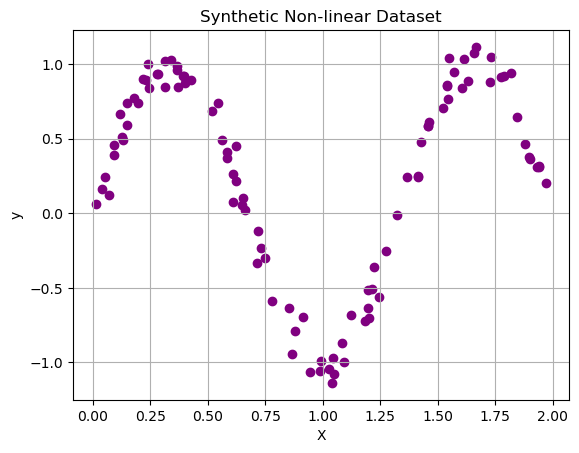

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 📌 Generate synthetic non-linear data
np.random.seed(42)
X = np.sort(2 * np.random.rand(100, 1), axis=0)   # values between 0 and 2
y = np.sin(1.5 * np.pi * X).ravel() + np.random.randn(100) * 0.1  # noisy sine curve

# 🔎 Visualize the data
plt.scatter(X, y, color='purple')
plt.title("Synthetic Non-linear Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# 📌 Degrees to test
degrees = [1, 3, 5, 9]
models = {}

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    models[degree] = model

print("✅ Models trained for degrees:", degrees)


✅ Models trained for degrees: [1, 3, 5, 9]


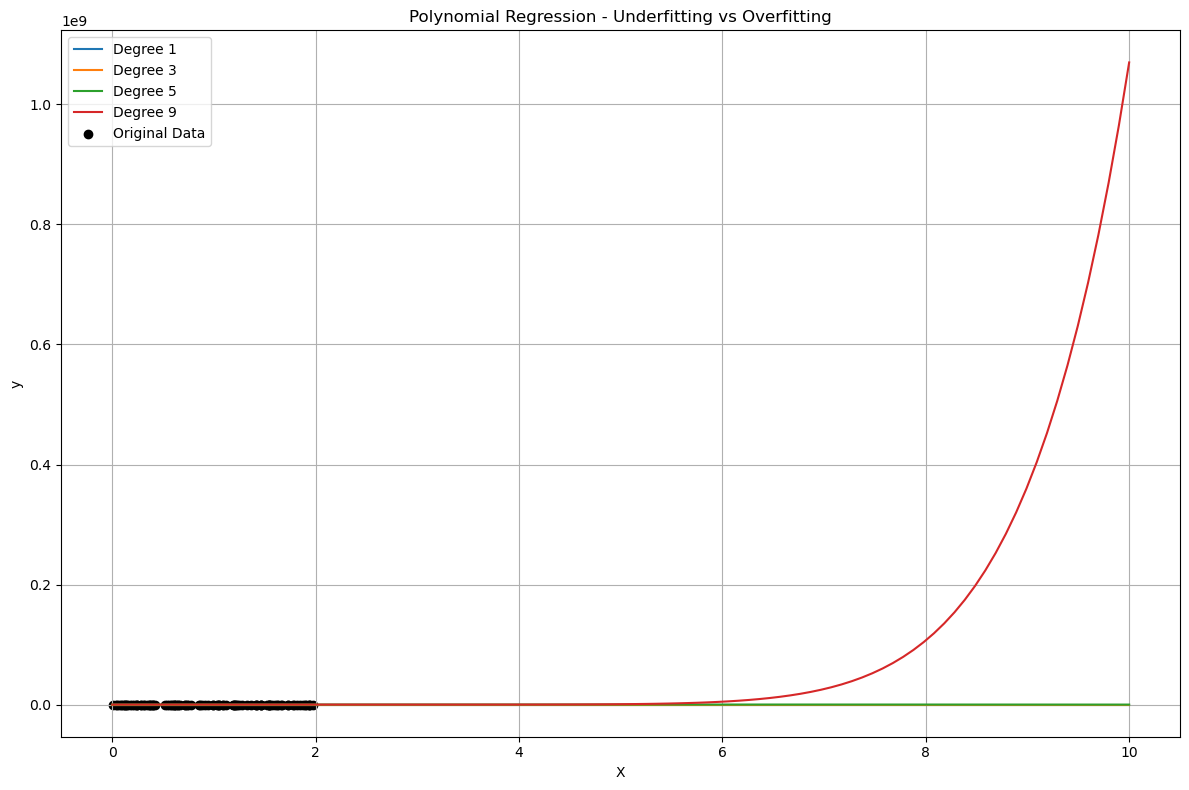

In [21]:
plt.figure(figsize=(12, 8))

# Sorted X for smooth curve
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)

for degree, model in models.items():
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, label=f"Degree {degree}")

# Plot original data
plt.scatter(X, y, color='black', label='Original Data')

plt.title("Polynomial Regression - Underfitting vs Overfitting")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
from sklearn.metrics import mean_squared_error

for degree, model in models.items():
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    print(f"🎯 Degree {degree} ➤ MSE: {mse:.4f}")


🎯 Degree 1 ➤ MSE: 0.4395
🎯 Degree 3 ➤ MSE: 0.2874
🎯 Degree 5 ➤ MSE: 0.0240
🎯 Degree 9 ➤ MSE: 0.0079
